# Exploring the German-Korean Tatoeba dataset
[Github](https://github.com/Helsinki-NLP/Tatoeba-Challenge)

[Huggingface](https://huggingface.co/datasets/Helsinki-NLP/tatoeba_mt)

In [1]:
from tatoeba import preprocess, analysis
from rude_nmt import label_german, label_korean
import re
import pandas as pd

In [2]:
subtitle_data = preprocess.get_subtitle_dataset()

In [3]:
len(subtitle_data)
print(subtitle_data)


Dataset({
    features: ['id', 'source', 'target'],
    num_rows: 996525
})


In [4]:
subtitle_data = subtitle_data.map(label_german.annotate_formality, load_from_cache_file=True, num_proc=4)
subtitle_data = subtitle_data.map(label_korean.annotate_formality, load_from_cache_file=False, num_proc=4)

Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-513dbcd49326e22b.arrow


Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-12dcf02b68b0a072.arrow


Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-d9469d5f63776e9f.arrow


Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/subtitles/cache-91842d310126534a.arrow


#0:   0%|          | 0/249132 [00:00<?, ?ex/s]

#2:   0%|          | 0/249131 [00:00<?, ?ex/s]

#1:   0%|          | 0/249131 [00:00<?, ?ex/s]

#3:   0%|          | 0/249131 [00:00<?, ?ex/s]

In [ ]:
subtitle_data.to_csv("./data/subtitle_data.csv")

In [ ]:
one_word_trg = analysis.get_one_word_sentences(subtitle_data)
print(one_word_trg)

In [5]:
dat = subtitle_data.to_pandas()

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996525 entries, 0 to 996524
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            996525 non-null  object  
 1   source        996525 non-null  object  
 2   target        996525 non-null  object  
 3   de_formality  996525 non-null  category
 4   ko_formality  996525 non-null  object  
dtypes: category(1), object(4)
memory usage: 31.4+ MB


In [8]:
dat["de_formality"] = dat["de_formality"].astype('category')

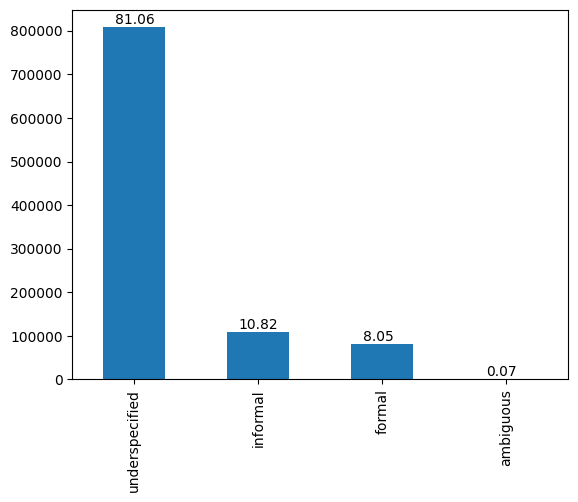

In [53]:
rows = len(dat.index)
ax = dat["de_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.16, b.y1 + 8000))

fig = ax.get_figure()
fig.savefig("german.png", bbox_inches="tight")

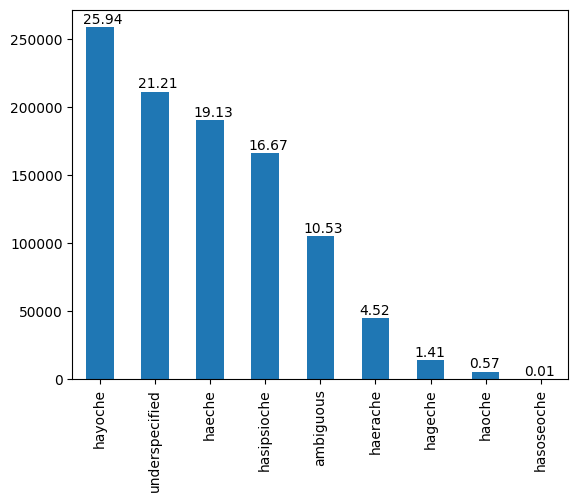

In [59]:
rows = len(dat.index)
ax = dat["ko_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.3, b.y1 + 2500))

fig = ax.get_figure()
fig.savefig("korean.png", bbox_inches="tight")

In [5]:
pd.set_option('display.max_rows', 500)

In [60]:
print(len(dat.index))

996525


In [6]:
dat["de_formality"].value_counts()

underspecified    807766
informal          107790
formal             80258
ambiguous            711
Name: de_formality, dtype: int64

In [7]:
dat["ko_formality"].value_counts()

hayoche           258488
underspecified    211361
haeche            190685
hasipsioche       166071
ambiguous         104962
haerache           45066
hageche            14030
haoche              5714
hasoseoche           148
Name: ko_formality, dtype: int64

In [ ]:
dat.head(10)

In [8]:
amb_dat = dat[dat["ko_formality"].str.match("underspecified")]

In [9]:
amb_dat.head(100)

,id,source,target,de_formality,ko_formality
3,OpenSubtitles-v2018\tdeu\tkor_Hang,Sie müssen mir helfen. Ich brauche Ihre Hilfe....,나도 그러고는 싶네만..,formal,underspecified
9,OpenSubtitles-v2018\tdeu\tkor_Hang,"""und führst ein anständiges Leben...",이제껏 그랬던 것처럼,underspecified,underspecified
17,OpenSubtitles-v2018\tdeu\tkor,Noch nicht.,"아뇨, 아직...",underspecified,underspecified
33,OpenSubtitles-v2018\tdeu\tkor_Hang,Welch schöner Gesang.,폐하,underspecified,underspecified
35,OpenSubtitles-v2018\tdeu\tkor,Willkommen im Club.,헛소리.,underspecified,underspecified
40,OpenSubtitles-v2018\tdeu\tkor,Ich meine...,내 말은...,underspecified,underspecified
45,OpenSubtitles-v2018\tdeu\tkor_Hang,Dein Leben hast du im kalifornischen Strafvoll...,스페인어도 못 하면서 어떻게 캘리포니아에서,informal,underspecified
50,TED2020-v1\tdeu\tkor_Hang,"Bis zur Anästhesie, der Abwesenheit von Gefühl.",고통을 없애는 마취를 치과의사였던 윌리엄 모톤이,underspecified,underspecified
52,OpenSubtitles-v2018\tdeu\tkor_Hang,Na bitte! Ein Naturtalent.,바로 그거야 아주 자연스러워,underspecified,underspecified
63,OpenSubtitles-v2018\tdeu\tkor_Hang,Sieh nur.,봐,underspecified,underspecified
